In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# Loading the dataset from a URL
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_data = pd.read_csv(url)

# Overview of the data (display the first 5 rows)
print(housing_data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [8]:
# Checking if there are any missing values in the data
print(housing_data.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [9]:
# Selecting numerical columns
numeric_columns = housing_data.select_dtypes(include=[np.number]).columns

# Replacing missing values with the median of the column
housing_data[numeric_columns] = housing_data[numeric_columns].fillna(housing_data[numeric_columns].median())

# Checking if there are still missing values after imputing
print(housing_data.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [10]:
# Converting categorical features into numerical dummy variables
housing_data = pd.get_dummies(housing_data, drop_first=True)


In [11]:
# Splitting the features (X) and the target variable (y)
X = housing_data.drop("median_house_value", axis=1)
y = housing_data["median_house_value"]


In [12]:
# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Initializing RandomForestRegressor with 500 trees and parallelization
model = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=15)


In [15]:
# Training the model with the training data
model.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=500, n_jobs=15, random_state=42)

In [16]:
# Making predictions on the test data
y_pred = model.predict(X_test_scaled)


In [17]:
# Calculating the model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root of the Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Coefficient of Determination (R²)

# Outputting the evaluation metrics
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Root Mean Squared Error: 48692.34059551582
R^2 Score: 0.8190683922318293


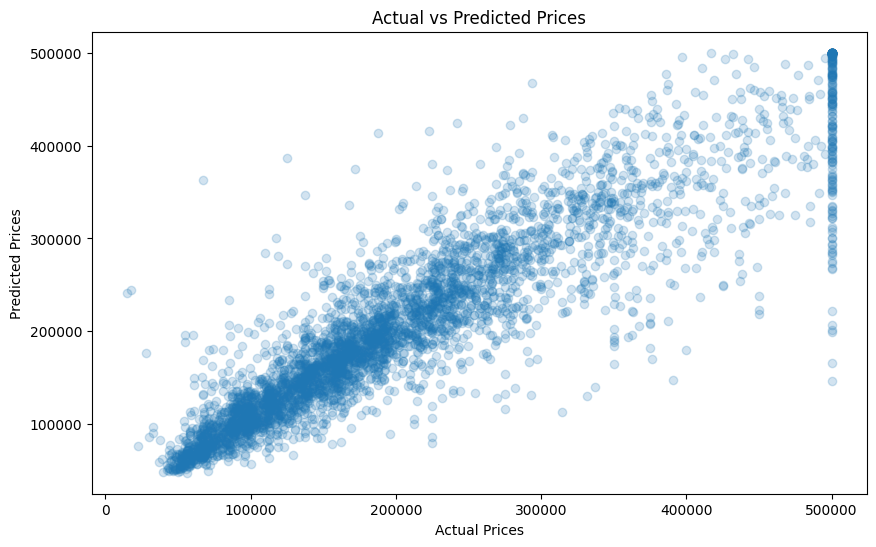

In [18]:
# Plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


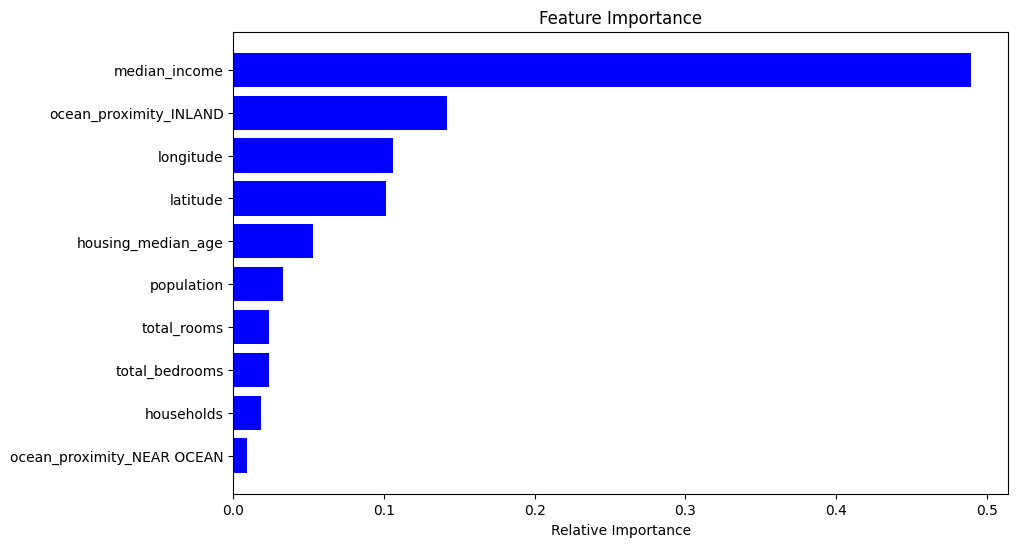

In [19]:
# Calculating and visualizing feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # The 10 most important features

# Plot of feature importance
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [20]:
# Test Data 1: Proximity to the Bay (Bay Area)
test_data_1 = pd.DataFrame({
    'longitude': [-122.23],
    'latitude': [37.88],
    'housing_median_age': [40.0],
    'total_rooms': [700.0],
    'total_bedrooms': [150.0],
    'population': [350.0],
    'households': [120.0],
    'median_income': [9.0],
    'ocean_proximity_NEAR BAY': [1],
    'ocean_proximity_INLAND': [0],
    'ocean_proximity_<1H OCEAN': [0],
    'ocean_proximity_ISLAND': [0]
})

# Test Data 2: Inland
test_data_2 = pd.DataFrame({
    'longitude': [-119.77],
    'latitude': [36.73],
    'housing_median_age': [20.0],
    'total_rooms': [1200.0],
    'total_bedrooms': [250.0],
    'population': [800.0],
    'households': [280.0],
    'median_income': [3.5],
    'ocean_proximity_NEAR BAY': [0],
    'ocean_proximity_INLAND': [1],
    'ocean_proximity_<1H OCEAN': [0],
    'ocean_proximity_ISLAND': [0]
})

# Test Data 3: Less than 1 Hour to the Ocean (<1H OCEAN)
test_data_3 = pd.DataFrame({
    'longitude': [-118.35],
    'latitude': [34.05],
    'housing_median_age': [15.0],
    'total_rooms': [1100.0],
    'total_bedrooms': [230.0],
    'population': [600.0],
    'households': [220.0],
    'median_income': [7.5],
    'ocean_proximity_NEAR BAY': [0],
    'ocean_proximity_INLAND': [0],
    'ocean_proximity_<1H OCEAN': [1],
    'ocean_proximity_ISLAND': [0]
})


In [30]:
# Combine all test data
test_data = pd.concat([test_data_1, test_data_2, test_data_3], ignore_index=True)
print(test_data)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                40.0        700.0           150.0   
1    -119.77     36.73                20.0       1200.0           250.0   
2    -118.35     34.05                15.0       1100.0           230.0   

   population  households  median_income  ocean_proximity_NEAR BAY  \
0       350.0       120.0            9.0                         1   
1       800.0       280.0            3.5                         0   
2       600.0       220.0            7.5                         0   

   ocean_proximity_INLAND  ocean_proximity_<1H OCEAN  ocean_proximity_ISLAND  
0                       0                          0                       0  
1                       1                          0                       0  
2                       0                          1                       0  


In [31]:
# Ensuring the number of columns matches
test_data_processed = test_data.reindex(columns=X_train.columns, fill_value=0)

# Scaling the test data
test_data_scaled = scaler.transform(test_data_processed)

# Making predictions
test_predictions = model.predict(test_data_scaled)

# Outputting the predictions
for i, pred in enumerate(test_predictions):
    print(f"Prediction for test case {i+1}: {pred:.2f} (House price in USD)")


Prediction for test case 1: 481196.37 (House price in USD)
Prediction for test case 2: 108282.00 (House price in USD)
Prediction for test case 3: 391449.33 (House price in USD)


In [32]:
# Create hypothetical datasets for different income groups
# All other features held constant to examine the effect of income
test_income_values = np.linspace(1, 15, 50)  # Income ranging from $10,000 to $150,000

# Example features that are kept constant
constant_features = {
    'longitude': [-122.23] * len(test_income_values),
    'latitude': [37.88] * len(test_income_values),
    'housing_median_age': [30] * len(test_income_values),
    'total_rooms': [800] * len(test_income_values),
    'total_bedrooms': [150] * len(test_income_values),
    'population': [400] * len(test_income_values),
    'households': [100] * len(test_income_values),
    'ocean_proximity_NEAR BAY': [1] * len(test_income_values),
    'ocean_proximity_INLAND': [0] * len(test_income_values),
    'ocean_proximity_<1H OCEAN': [0] * len(test_income_values),
    'ocean_proximity_ISLAND': [0] * len(test_income_values)
}


In [35]:
# Create DataFrame from the constant features and varying income values
income_effect_df = pd.DataFrame({
    'median_income': test_income_values,  # Varying income values
    **constant_features  # Unpack the constant features dictionary
})


# Adjusting the test data to match the columns of the training data
# Columns missing in the test data will be filled with 0
income_effect_df = income_effect_df.reindex(columns=X_train.columns, fill_value=0)

# Scaling new data 
income_effect_scaled = scaler.transform(income_effect_df)

# Predictions based on the different income levels
predicted_prices = model.predict(income_effect_scaled)


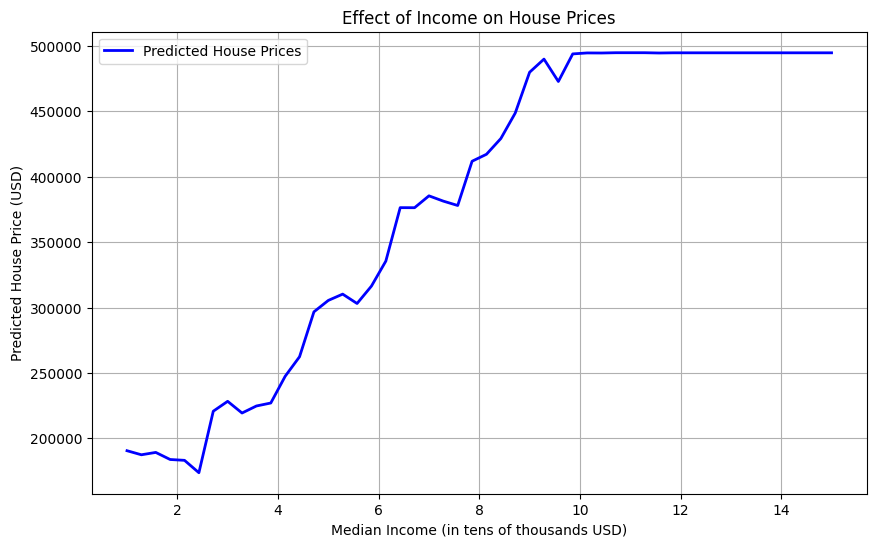

In [36]:
# Plot of results: House price as a function of income
plt.figure(figsize=(10,6))
plt.plot(test_income_values, predicted_prices, label='Predicted House Prices', color='b', lw=2)
plt.xlabel('Median Income (in tens of thousands USD)')
plt.ylabel('Predicted House Price (USD)')
plt.title('Effect of Income on House Prices')
plt.grid(True)
plt.legend()
plt.show()


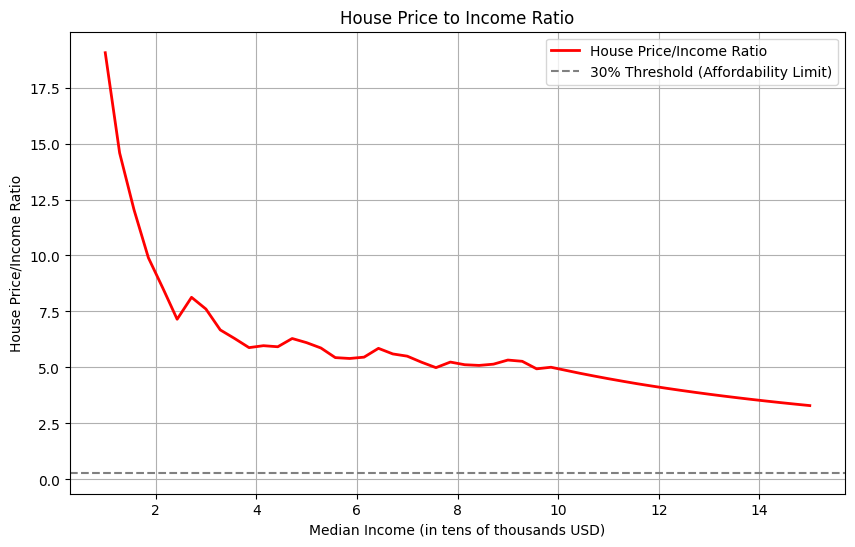

In [37]:
# Proportion of income required for housing costs (house price)
income_vs_price_ratio = predicted_prices / (test_income_values * 10000) 

# Plot House price to income ratio
plt.figure(figsize=(10,6))
plt.plot(test_income_values, income_vs_price_ratio, label='House Price/Income Ratio', color='r', lw=2)
plt.axhline(y=0.3, color='gray', linestyle='--', label='30% Threshold (Affordability Limit)')
plt.xlabel('Median Income (in tens of thousands USD)')
plt.ylabel('House Price/Income Ratio')
plt.title('House Price to Income Ratio')
plt.grid(True)
plt.legend()
plt.show()


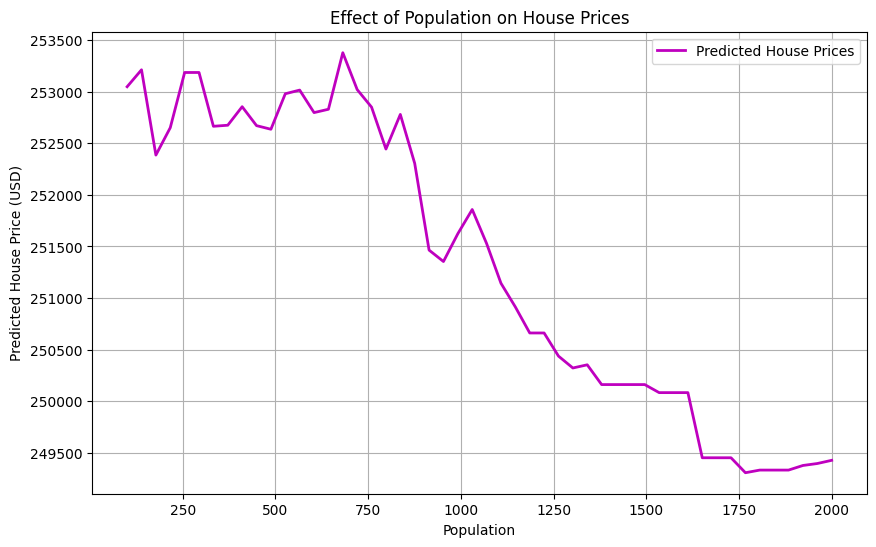

In [38]:
# Varying population size
test_population_values = np.linspace(100, 2000, 50)

# Creating a DataFrame with variable population and constant other features
population_effect_df = pd.DataFrame({
    'longitude': [-122.23] * len(test_population_values),
    'latitude': [37.88] * len(test_population_values),
    'housing_median_age': [30] * len(test_population_values),
    'total_rooms': [800] * len(test_population_values),
    'total_bedrooms': [150] * len(test_population_values),
    'population': test_population_values,
    'households': [100] * len(test_population_values),
    'median_income': [5.0] * len(test_population_values),
    'ocean_proximity_NEAR BAY': [0] * len(test_population_values),
    'ocean_proximity_INLAND': [1] * len(test_population_values),
    'ocean_proximity_<1H OCEAN': [0] * len(test_population_values),
    'ocean_proximity_ISLAND': [0] * len(test_population_values)
})

# Adjusting the columns to match the training set
population_effect_df = population_effect_df.reindex(columns=X_train.columns, fill_value=0)

# Scaling the population data
population_effect_scaled = scaler.transform(population_effect_df)

# Predictions for different population sizes
predicted_population_prices = model.predict(population_effect_scaled)

# Plot House prices based on population size
plt.figure(figsize=(10,6))
plt.plot(test_population_values, predicted_population_prices, label='Predicted House Prices', color='m', lw=2)
plt.xlabel('Population')
plt.ylabel('Predicted House Price (USD)')
plt.title('Effect of Population on House Prices')
plt.grid(True)
plt.legend()
plt.show()


In [29]:
# Checking how many records and columns are in the DataFrame
print(f"Number of records: {housing_data.shape[0]}")
print(f"Number of columns: {housing_data.shape[1]}")


Number of records: 20640
Number of columns: 13
